# Lab 16_Module_2: Regression Analysis


# Challenge 1


In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

student_data = pd.DataFrame({ 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies' : [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


1.1.Draw a dispersion diagram (scatter plot) for the data.



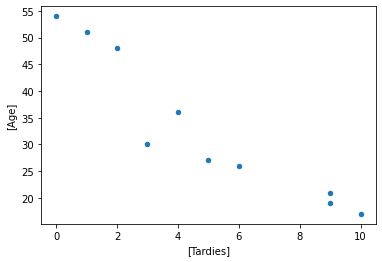

In [28]:
X= student_data.plot.scatter(x=['Tardies'], y=['Age'])

1.2.Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?



In [ ]:
"Yes we can say that we have a linear relationship, so linear regression "

1.3.Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [30]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [31]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


1.4.Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.



In [36]:
from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.24282077091598084
The intercept is: 12.88880336313577


1.5.Plot your regression model on your scatter plot.



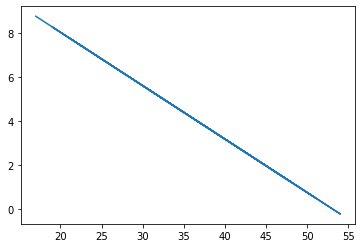

In [48]:
slope, intercept = np.polyfit(X, Y, 1)

plt.plot(X, slope*X+intercept)

1.6.Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code

In [ ]:
" Yes, we cab that the age is a real predictor of tardiness,
"because when we see that at 55, 48 and 51 w e have the Tardiesi between à and 1"

# Challange 2

In [69]:
import pandas as pd
vehicles = pd.read_csv(r'C:\Users\Mtime\OneDrive\Bureau\vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


2.2.Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [73]:
np.corrcoef(vehicles['Year'],vehicles['CO2 Emission Grams/Mile'])

array([[1.        , 0.93086515],
       [0.93086515, 1.        ]])

In [76]:
np.corrcoef(vehicles['Cylinders'],vehicles['CO2 Emission Grams/Mile'])

array([[1.        , 0.75239255],
       [0.75239255, 1.        ]])

In [75]:
np.corrcoef(vehicles['Fuel Barrels/Year'],vehicles['CO2 Emission Grams/Mile'])
"the big corr values"

array([[1.        , 0.98618866],
       [0.98618866, 1.        ]])

In [77]:
np.corrcoef(vehicles['Combined MPG'],vehicles['CO2 Emission Grams/Mile'])

array([[ 1.        , -0.92622904],
       [-0.92622904,  1.        ]])

In [78]:
np.corrcoef(vehicles['Fuel Cost/Year'],vehicles['CO2 Emission Grams/Mile'])

array([[1.        , 0.93086515],
       [0.93086515, 1.        ]])

In [ ]:
"the most important variable in determining CO2 emissions is Fuel Barrels/Year with the high corr values "

2.3.Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.



In [82]:
import statsmodels.api as sm

X = sm.add_constant(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]) 
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
#it's a linear regression type 

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                             20:08:48   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.4.Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# we have R-square = 0.981, we can say that the data really depend to the variables; 
# Adj. R-squared have the same value as R-square, that we confirm the proposition
# abig F-statistic number a small std err values..

# Bonus Challenge: Error Analysis


In [96]:
import pandas as pd
import seaborn as sns 
invite  = pd.DataFrame({'X': [1,3,4,6,8,9,11,14] , 'Y' : [1,2,4,4,5,7,8,13]})
invite

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.



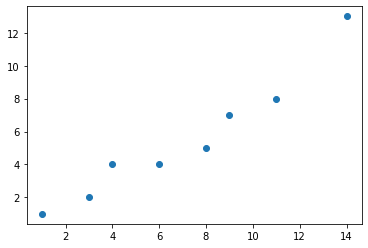

In [97]:
plt.scatter(x= invite['X'], y = invite['Y'])

<AxesSubplot:xlabel='X', ylabel='Y'>

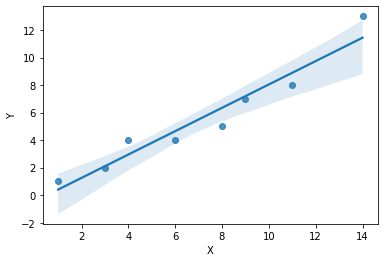

In [98]:
sns.regplot(x= invite['X'], y = invite['Y'], data = invite)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.



In [101]:
# it's a linear regression 
X = invite['X']
Y = invite['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.

In [107]:
invite.drop(invite.index[[7,6]])

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7


The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


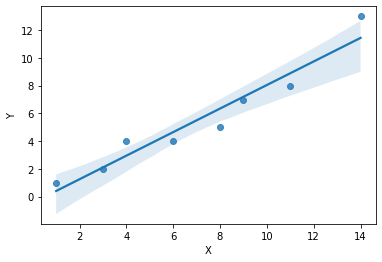

In [105]:
sns.regplot(x= invite['X'], y = invite['Y'], data = invite)
X = invite['X']
Y = invite['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?



In [ ]:
# nothing changed, i have allowys the same slope and The intercept point,
# i think because of the small shape of data w can't see a real change